In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("jobs_cleaned.csv")

In [307]:
df.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min Salary,Max Salary,Avg Salary,Tools,Skills
0,Data Scientist,"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research,NM,CA,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91,72.0,"python,matlab,excel,power bi,tableau","visualization,engineering,collection,analysis"
1,Data Scientist,What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System,MD,MD,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112,87.5,"python,java","visualization,engineering,analysis,predict,mod..."
2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,FL,FL,501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80,90,85.0,"python,excel,spark,sql,matplotlib","visualization,engineering,collection,analysis,..."
3,Data Scientist,*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL,WA,WA,1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56,97,76.5,python,"engineering,analysis,predict,modeling"
4,Data Scientist,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions,NY,NY,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86,143,114.5,"python,excel,sql","analysis,modeling"


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          738 non-null    object 
 1   Job Description    738 non-null    object 
 2   Rating             738 non-null    float64
 3   Company Name       738 non-null    object 
 4   Location           738 non-null    object 
 5   Headquarters       738 non-null    object 
 6   Size               738 non-null    object 
 7   Founded            738 non-null    int64  
 8   Type of ownership  738 non-null    object 
 9   Industry           738 non-null    object 
 10  Sector             738 non-null    object 
 11  Revenue            738 non-null    object 
 12  Competitors        738 non-null    object 
 13  Min Salary         738 non-null    int64  
 14  Max Salary         738 non-null    int64  
 15  Avg Salary         738 non-null    float64
 16  Tools              738 non

In [14]:
df.fillna(value = 'others', inplace  = True)

In [26]:
size = df['Size'].value_counts()

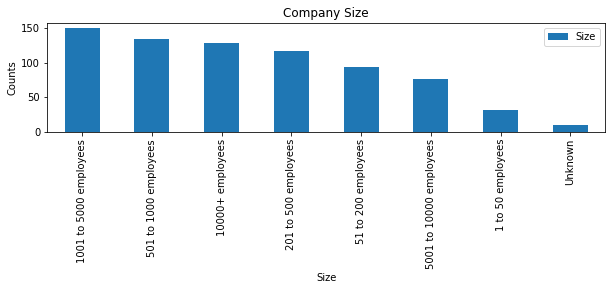

In [31]:
plt.figure(figsize = (10, 2))
size.plot(kind = 'bar')
plt.title("Company Size")
plt.ylabel("Counts")
plt.xlabel("Size")
plt.legend()
plt.show()

In [56]:
def avg_min_pay(posts):
    avg_pay = list()
    for post in posts:
        avg_pay.append(df['Min Salary'].loc[df['Job Title'] == post].mean())
    return avg_pay

In [62]:
posts = ['Data Scientist','Data Analyst','Data Engineer', 'Other']

In [63]:
avg_pay = avg_min_pay(posts)

In [64]:
avg_pay

[90.41157556270096, 47.221311475409834, 76.15126050420169, 63.456989247311824]

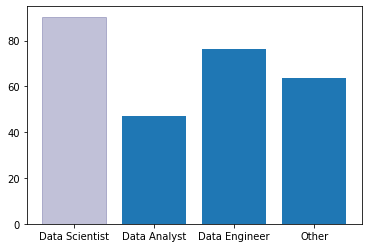

In [75]:
bars = plt.bar(x = posts, height = avg_pay)
bars[0].set_color((0.2, 0.2, 0.5, 0.3))

In [76]:
def avg_max_pay(posts):
    avg_pay = list()
    for post in posts:
        avg_pay.append(df['Max Salary'].loc[df['Job Title'] == post].mean())
    return avg_pay

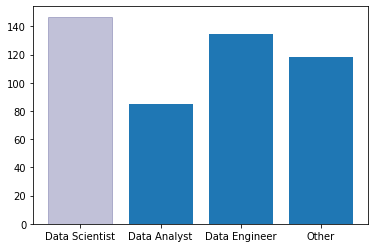

In [79]:
avg_pay_max = avg_max_pay(posts)
bars = plt.bar(x = posts, height = avg_pay_max)
bars[0].set_color((0.2, 0.2, 0.5, 0.3))

In [80]:
avg_pay_max

[146.89389067524115, 84.74590163934427, 134.65546218487395, 118.13978494623656]

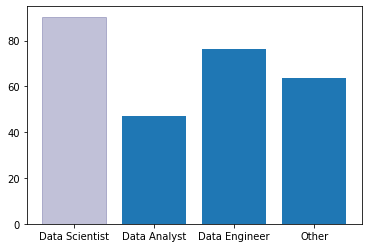

In [82]:
def avg_pay(posts):
    avg_pay = list()
    for post in posts:
        avg_pay.append(df['Avg Salary'].loc[df['Job Title'] == post].mean())
    return avg_pay
mean_pay = avg_min_pay(posts)
bars = plt.bar(x = posts, height = mean_pay)
bars[0].set_color((0.2, 0.2, 0.5, 0.3))

In [93]:
revenue_vs_salary

{'$100 to $500 million (USD)': 83.15384615384616,
 '$25 to $50 million (USD)': 83.94871794871794,
 '$500 million to $1 billion (USD)': 86.99122807017544,
 '$5 to $10 billion (USD)': 94.1842105263158,
 '$2 to $5 billion (USD)': 94.73076923076923,
 '$10 to $25 million (USD)': 100.359375,
 '$50 to $100 million (USD)': 100.56521739130434,
 'Unknown / Non-Applicable': 104.3103448275862,
 '$1 to $2 billion (USD)': 104.53333333333333,
 'Less than $1 million (USD)': 108.625,
 '$10+ billion (USD)': 116.02868852459017,
 '$1 to $5 million (USD)': 119.3125,
 '$5 to $10 million (USD)': 126.11111111111111}

<BarContainer object of 13 artists>

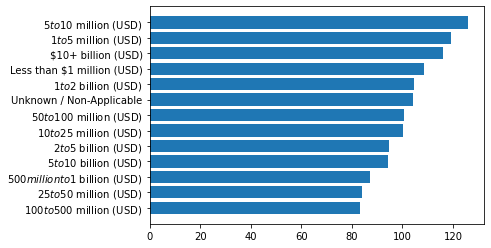

In [220]:
values = revenue_vs_salary.values()
keys = revenue_vs_salary.keys()
plt.barh(list(keys), list(values))

In [151]:
location_dict = df['Avg Salary'].groupby(df['Location']).mean().sort_values(ascending = False)[0:10].to_dict()

In [118]:
df['Location'] = df.Location.apply(lambda x : 'CA' if x.lower() == 'los angeles' else x)

<BarContainer object of 10 artists>

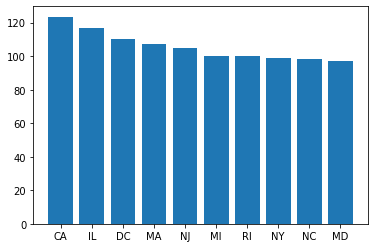

In [152]:
plt.bar(x = location_dict.keys(), height = location_dict.values())

In [158]:
rating_bins = np.arange(-1, 6, 1)

In [175]:
df1 = df['Rating']

<AxesSubplot:ylabel='Frequency'>

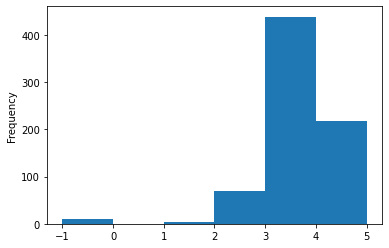

In [177]:
df1.plot.hist(bins = rating_bins)

<AxesSubplot:xlabel='Rating', ylabel='Avg Salary'>

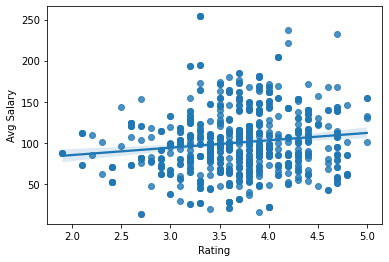

In [179]:
sns.regplot(data = df.loc[df['Rating'] != -1], x = 'Rating', y = 'Avg Salary')

In [182]:
df[['Rating','Avg Salary']].corr()

,Rating,Avg Salary
Rating,1.000000,0.016567
Avg Salary,0.016567,1.000000


<BarContainer object of 9 artists>

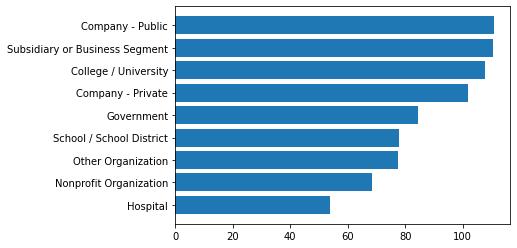

In [199]:
asd = df['Avg Salary'].groupby(df['Type of ownership']).mean().sort_values(ascending = True).to_dict()
plt.barh(list(asd.keys()),list(asd.values()))

<BarContainer object of 10 artists>

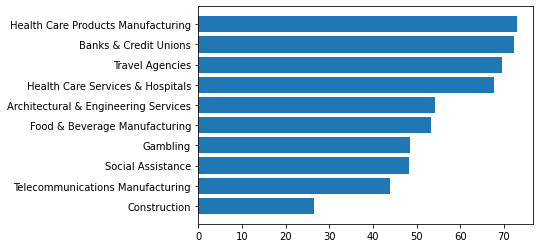

In [203]:
asd = df['Avg Salary'].groupby(df['Industry']).mean().sort_values(ascending = True)[0:10].to_dict()
plt.barh(list(asd.keys()),list(asd.values()))

<BarContainer object of 10 artists>

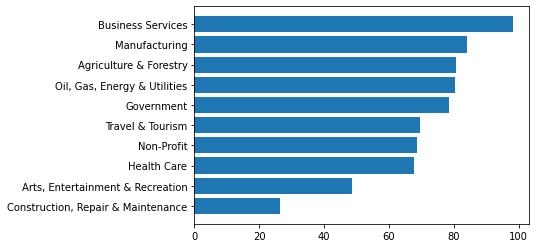

In [219]:
asd = df['Avg Salary'].groupby(df['Sector']).mean().sort_values(ascending = True)[0:10].to_dict()
plt.barh(list(asd.keys()),list(asd.values()))

In [218]:
df.groupby(['Type of ownership','Sector','Industry',])['Avg Salary'].mean().sort_values(ascending = False)

Type of ownership               Sector                              Industry                                
Subsidiary or Business Segment  Information Technology              Computer Hardware & Software                204.750000
Company - Private               Finance                             Financial Analytics & Research              164.000000
                                Retail                              Other Retail Stores                         163.500000
Subsidiary or Business Segment  Media                               Motion Picture Production & Distribution    146.000000
Company - Private               Education                           K-12 Education                              140.000000
                                                                                                                   ...    
Nonprofit Organization          Non-Profit                          Social Assistance                            48.166667
                              

In [234]:
df['Tools']

0        python,matlab,excel,power bi,tableau
1                                 python,java
2           python,excel,spark,sql,matplotlib
3                                      python
4                            python,excel,sql
                        ...                  
733                                       aws
734    python,java,hadoop,spark,sql,aws,scala
735                                     excel
736                                     excel
737                                    python
Name: Tools, Length: 738, dtype: object

In [16]:
def tools_split(tools):
    tools = str(tools)
    tool_list = tools.split(',')
    return tool_list

df['Tools'] = df['Tools'].apply(tools_split)
df['Skills'] = df['Skills'].apply(tools_split)

In [17]:
Skills_list = list(set(df["Skills"].explode()))
Tools_list = list(set(df["Tools"].explode()))

In [20]:
df[Skills_list] = 0
df[Tools_list] = 0

In [24]:
def fill_tools(df):
    for i in df.index:
        for tool in Tools_list:
            if tool in df['Tools'][i]:
                df[tool][i] = 1
def fill_skills(df):
    for i in df.index:
        for skill in Skills_list:
            if skill in df['Skills'][i]:
                df[skill][i] = 1
fill_tools(df)
fill_skills(df)

C:\Users\acer\AppData\Local\Temp/ipykernel_15652/536341455.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[tool][i] = 1
C:\Users\acer\AppData\Local\Temp/ipykernel_15652/536341455.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[skill][i] = 1


In [28]:
df.drop(columns = ['Tools','Skills'], axis = 1, inplace  =True)

In [27]:
avg_salary_tools = list()
for tool in Tools_list:
    avg_salary_tools.append(df[df[tool] == 1]['Avg Salary'].mean())
        

<BarContainer object of 24 artists>

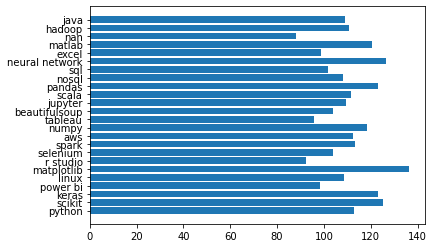

In [325]:
plt.barh(Tools_list, avg_salary_tools)

<BarContainer object of 10 artists>

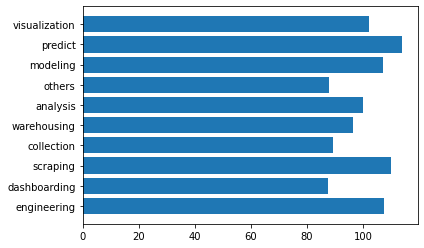

In [28]:
avg_salary_skills = list()
for skill in Skills_list:
    avg_salary_skills.append(df[df[skill] == 1]['Avg Salary'].mean())
plt.barh(Skills_list, avg_salary_skills)

In [29]:
df.to_csv("jobs_cleaned.csv",index = False)